<a href="https://colab.research.google.com/github/ayeshafirdose31/Cognizant_AI/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


And now we can import this package like so:

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

---

## Section 2 - Data loading

Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

In [80]:
path = "/content/drive/MyDrive/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


---

## Section 3 - Descriptive statistics



In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [82]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [83]:
df.shape


(7829, 9)

In [84]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
7824    False
7825    False
7826    False
7827    False
7828    False
Length: 7829, dtype: bool

In [85]:
df.isnull().sum()


transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [86]:


# Extracting Date,Year,Month,Day
df.timestamp = pd.to_datetime(df.timestamp)


In [87]:
df['day'] = df.timestamp.dt.day_name() # Thanks @Mark Wang
df['year'] = df.timestamp.dt.year
df['month'] = df.timestamp.dt.month


In [88]:

df.drop(["product_id"],axis=1,inplace=True)
df.drop(["transaction_id"],axis=1,inplace=True)


In [89]:
df.drop(["timestamp"],axis=1,inplace=True)

# Checking Unique Values

In [90]:
df["day"].unique()

array(['Wednesday', 'Sunday', 'Friday', 'Saturday', 'Monday', 'Tuesday',
       'Thursday'], dtype=object)

In [91]:
df["day"].unique()

array(['Wednesday', 'Sunday', 'Friday', 'Saturday', 'Monday', 'Tuesday',
       'Thursday'], dtype=object)

In [92]:
df["year"].unique()

array([2022])

In [93]:
df["customer_type"].unique()

array(['gold', 'standard', 'premium', 'basic', 'non-member'], dtype=object)

In [94]:
df["category"].unique()

array(['fruit', 'vegetables', 'refrigerated items', 'frozen',
       'spices and herbs', 'canned foods', 'packaged foods',
       'condiments and sauces', 'beverages', 'dairy', 'cheese', 'meat',
       'seafood', 'baked goods', 'baking', 'snacks', 'baby products',
       'pets', 'personal care', 'medicine', 'kitchen',
       'cleaning products'], dtype=object)

In [95]:
df["payment_type"].unique()

array(['e-wallet', 'debit card', 'cash', 'credit card'], dtype=object)

---

## Section 4 - Visualisation

Now that you've computed some descriptive statistics of the dataset, let's create some visualisations. You may use any package that you wish for visualisation, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

In [96]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
import seaborn as sns

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [98]:
df.head()

,category,customer_type,unit_price,quantity,total,payment_type,day,year,month
0,fruit,gold,3.99,2,7.98,e-wallet,Wednesday,2022,3
1,fruit,standard,3.99,1,3.99,e-wallet,Sunday,2022,3
2,fruit,premium,0.19,2,0.38,e-wallet,Friday,2022,3
3,fruit,gold,0.19,4,0.76,e-wallet,Wednesday,2022,3
4,fruit,basic,4.49,2,8.98,debit card,Saturday,2022,3


In [99]:
df['customer_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7829 entries, 0 to 7828
Series name: customer_type
Non-Null Count  Dtype 
--------------  ----- 
7829 non-null   object
dtypes: object(1)
memory usage: 61.3+ KB


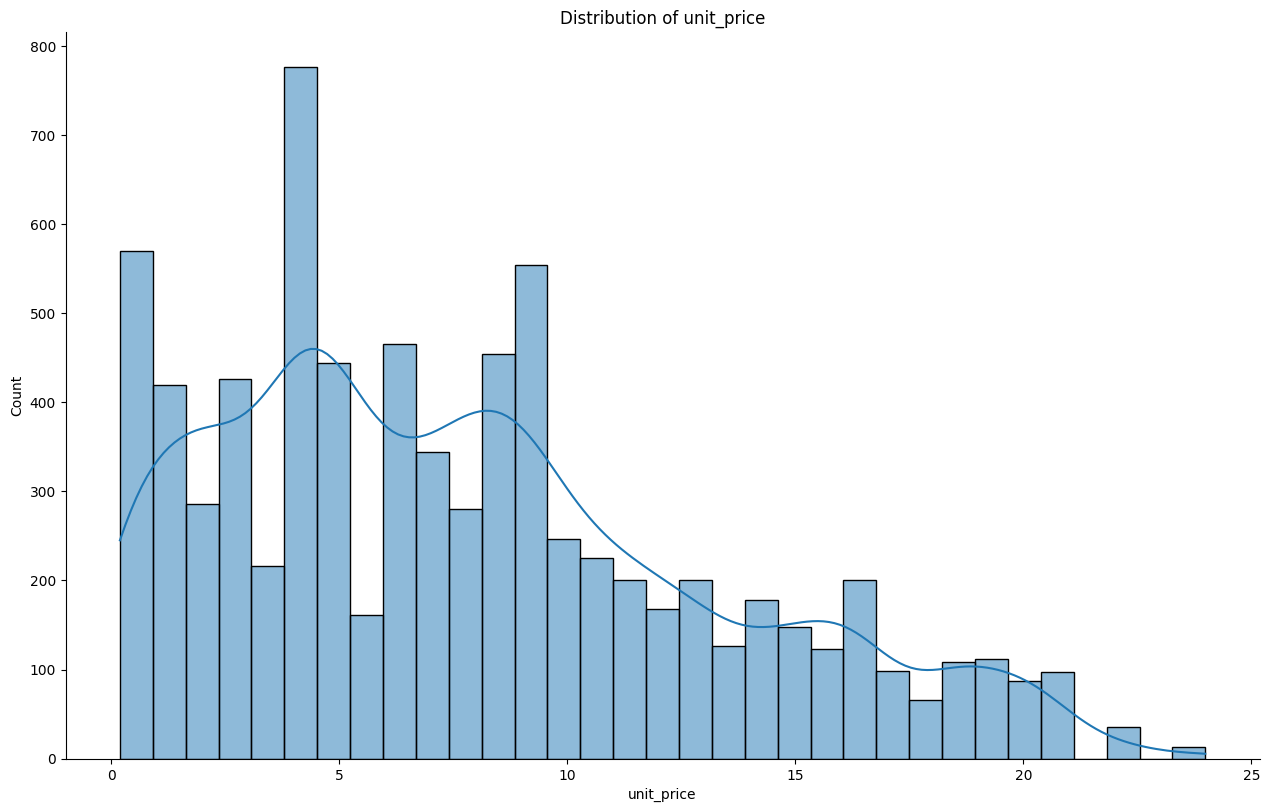

In [100]:
plot_continuous_distribution(df, 'unit_price')


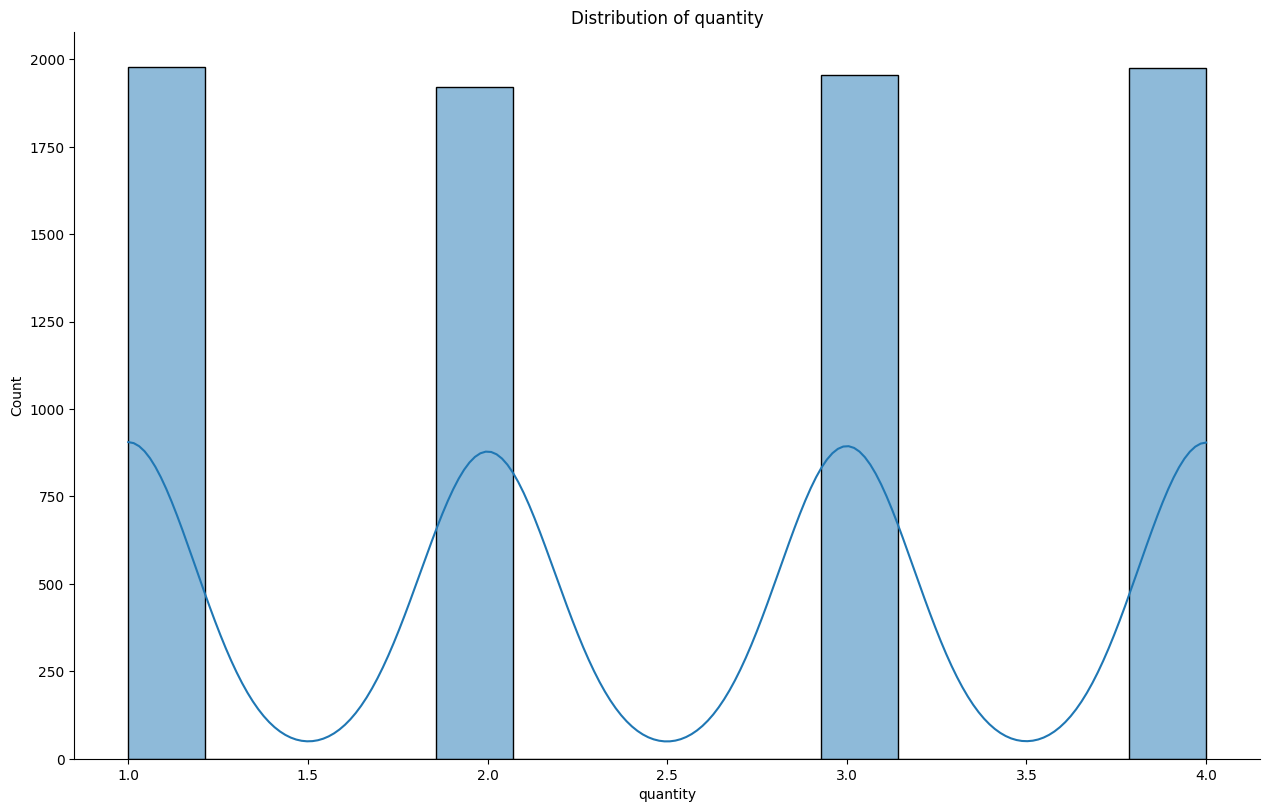

In [101]:
plot_continuous_distribution(df, 'quantity')


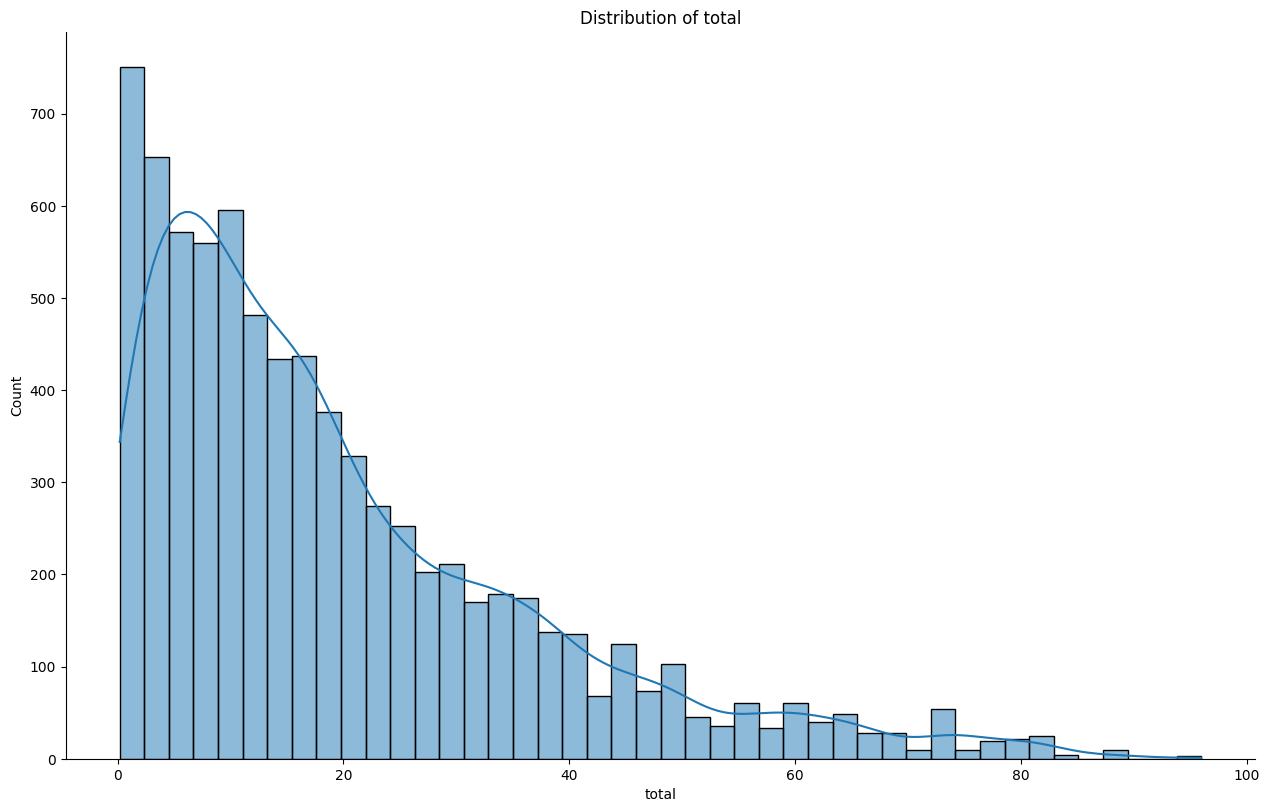

In [102]:
plot_continuous_distribution(df, 'total')


# Univariate Analysis.

<Axes: ylabel='customer_type'>

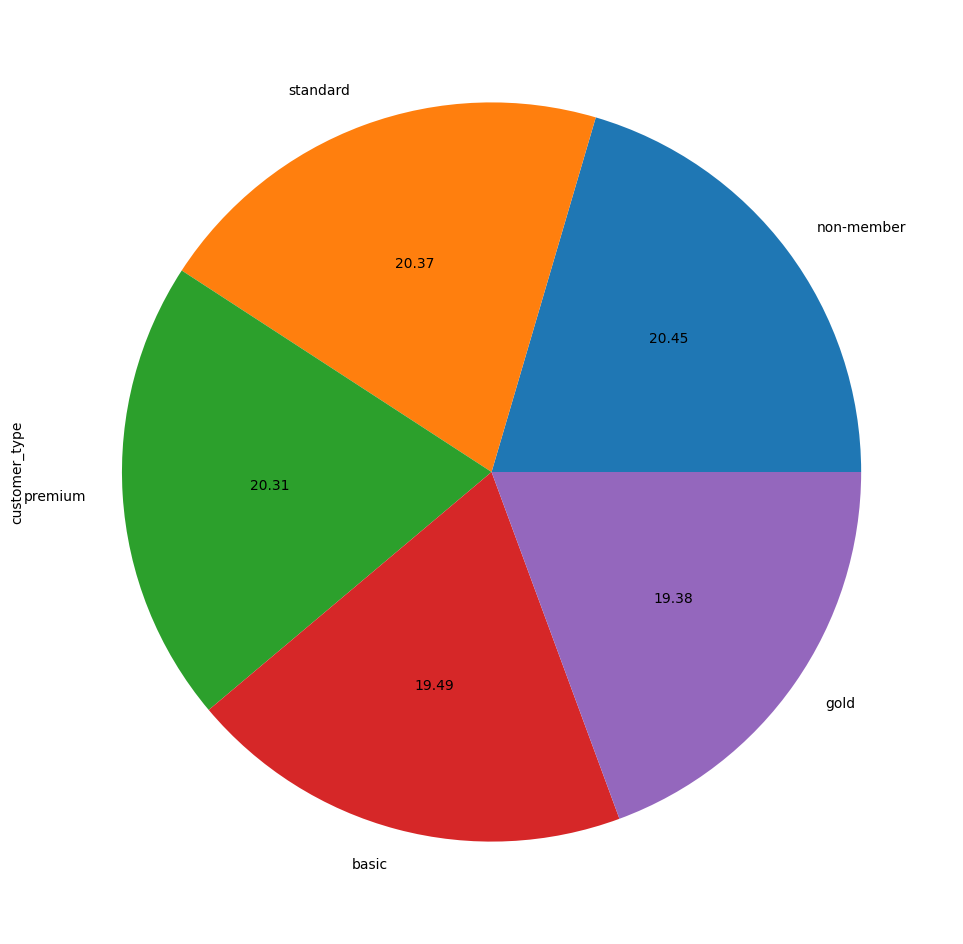

In [103]:
df["customer_type"].value_counts().plot(kind='pie',autopct='%.2f')

##Here we can see that the percentage of Non-Members are more followed by Standard members, and Premium members, so we can increase the sale by offering coupons to them to attract the customers with benefits compared to other stores.

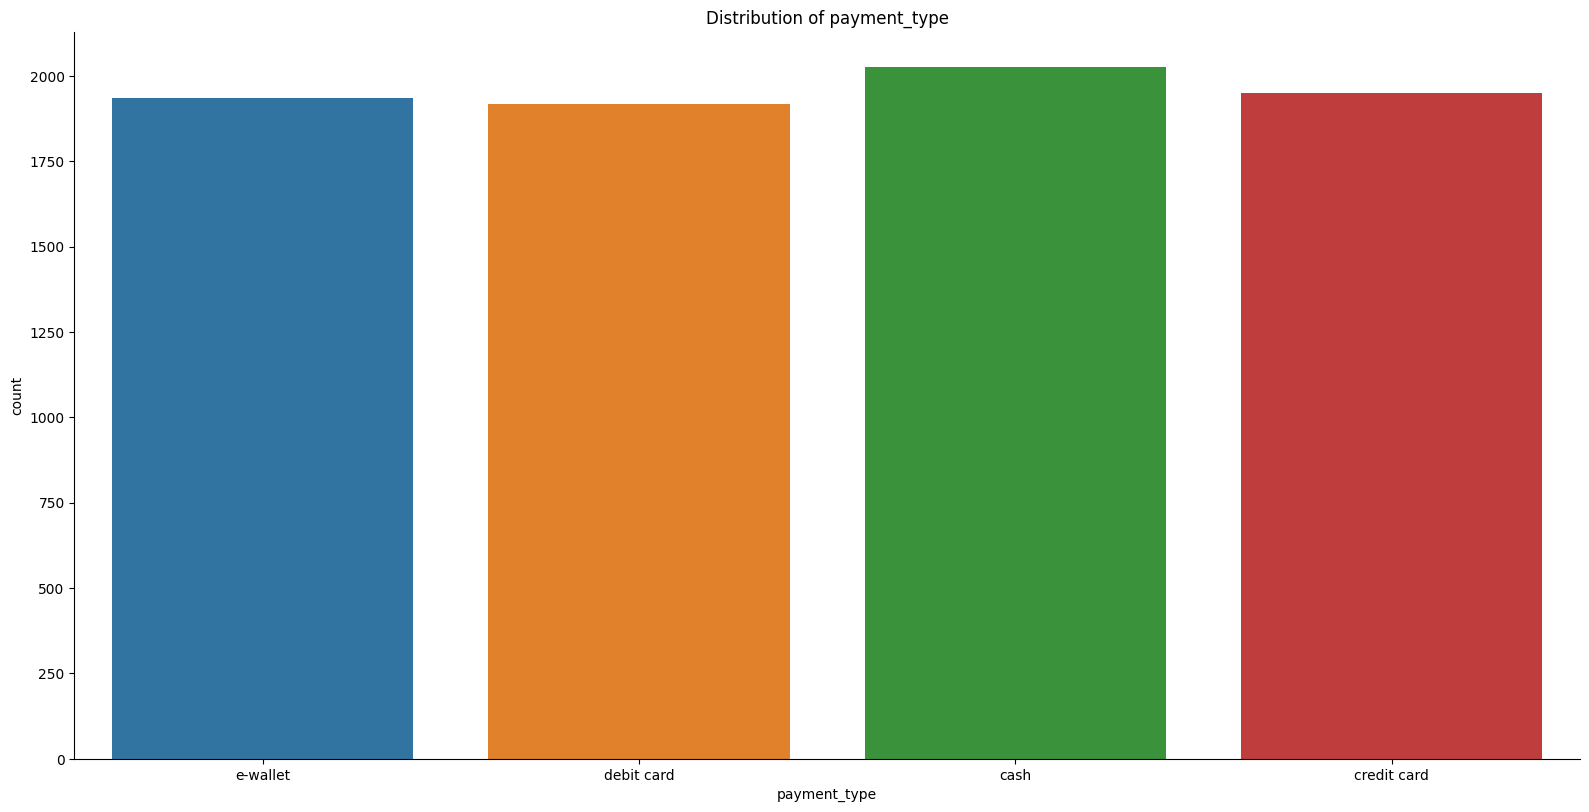

In [104]:
plot_categorical_distribution(df, 'payment_type')


### From the above inference we may say that the payment type that the customers prefer at our store is **cash** followed by **credit card** compared to **e-wallet** or **debit card**.

#Bi-Variate

###Top 3 Contributors with respect to their category.

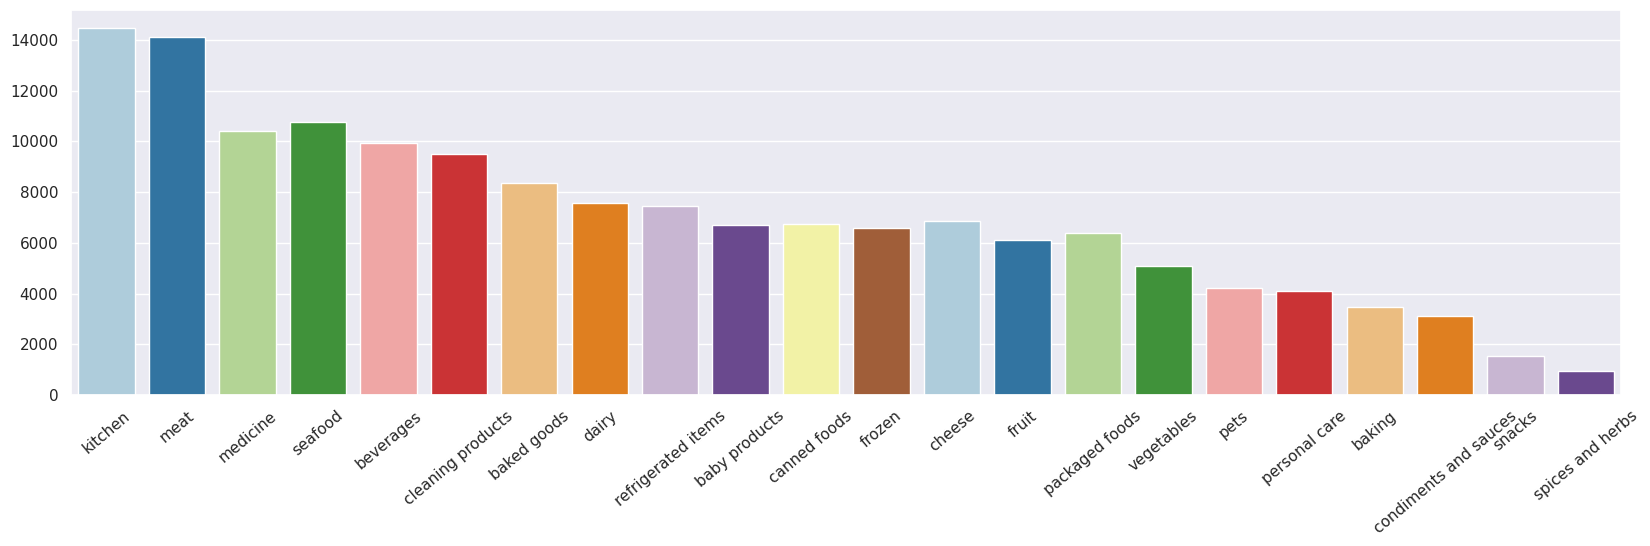

category
kitchen    14456.65
meat       14102.31
seafood    10754.81
Name: total, dtype: float64


In [111]:

plt.figure(figsize=(20,5))
ax=sns.barplot(x=list(df.groupby('category').sum().sort_values(by='unit_price',ascending=False).index),
               y=list(df.groupby('category').sum().sort_values(by='unit_price',ascending=False).iloc[:,2]),
               data=df,palette='Paired')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.show()
print(df.groupby('category').sum()['total'].sort_values(ascending=False).head(3))

###**Inference**: The **kitchen, meat and medicine** contribute highest sale at our store and we may also include the latest items to our list so to attract our customers.


### Customers and their payment type

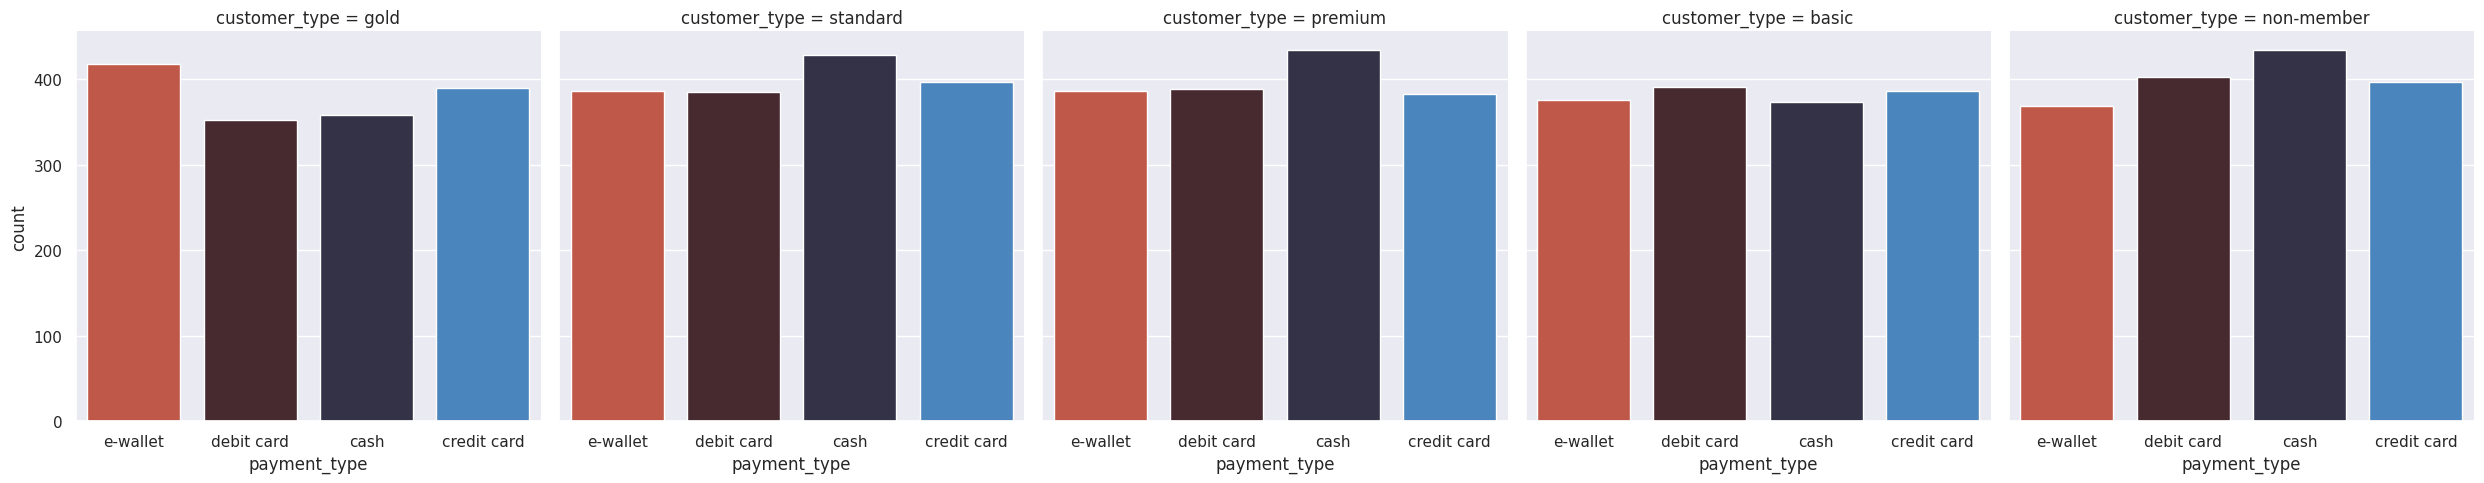

In [115]:
room_type_pref = sns.catplot(data=df,x='payment_type',kind='count',col='customer_type', palette='icefire_r')

###Inference:
Premium Customers: Prefer Cash followed by debit card

Gold Customers: Prefer e-waller followed by credit card

Standard Customers: Prefer cash followed by credit card

Basic Customers: Prefer debit card

Non-Member: Prefer cash or debit_card

###Total Sales per category

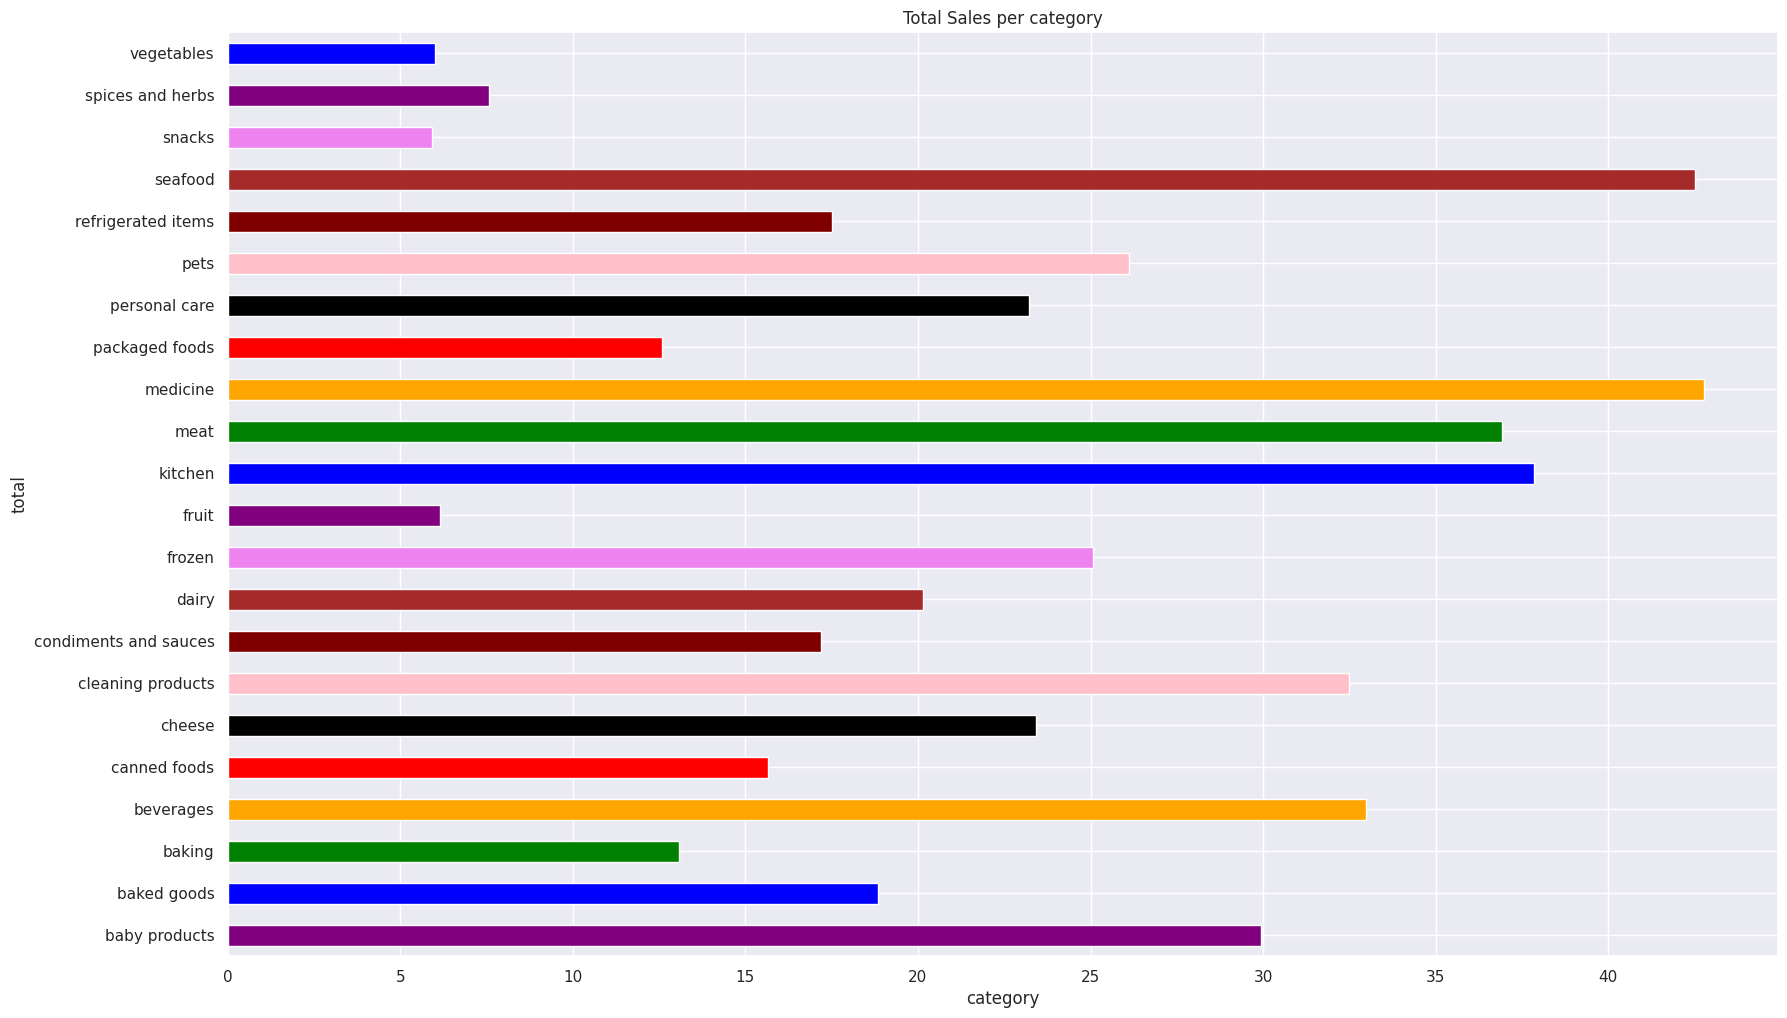

In [198]:
import matplotlib.pyplot as plt

# Define a list of colors for each category
colors = ['purple', 'blue', 'green', 'orange', 'red', "black",'pink','maroon','brown','violet']

# Generate the bar plot with multiple colors
df.groupby('category')['total'].mean().plot(kind='barh', color=colors)

# Add title and labels
plt.title('Total Sales per category')
plt.xlabel('category')
plt.ylabel('total')

# Display the plot
plt.show()

### Here we can see total sales by each category.

##Daily Sales Data

<Axes: xlabel='day', ylabel='total'>

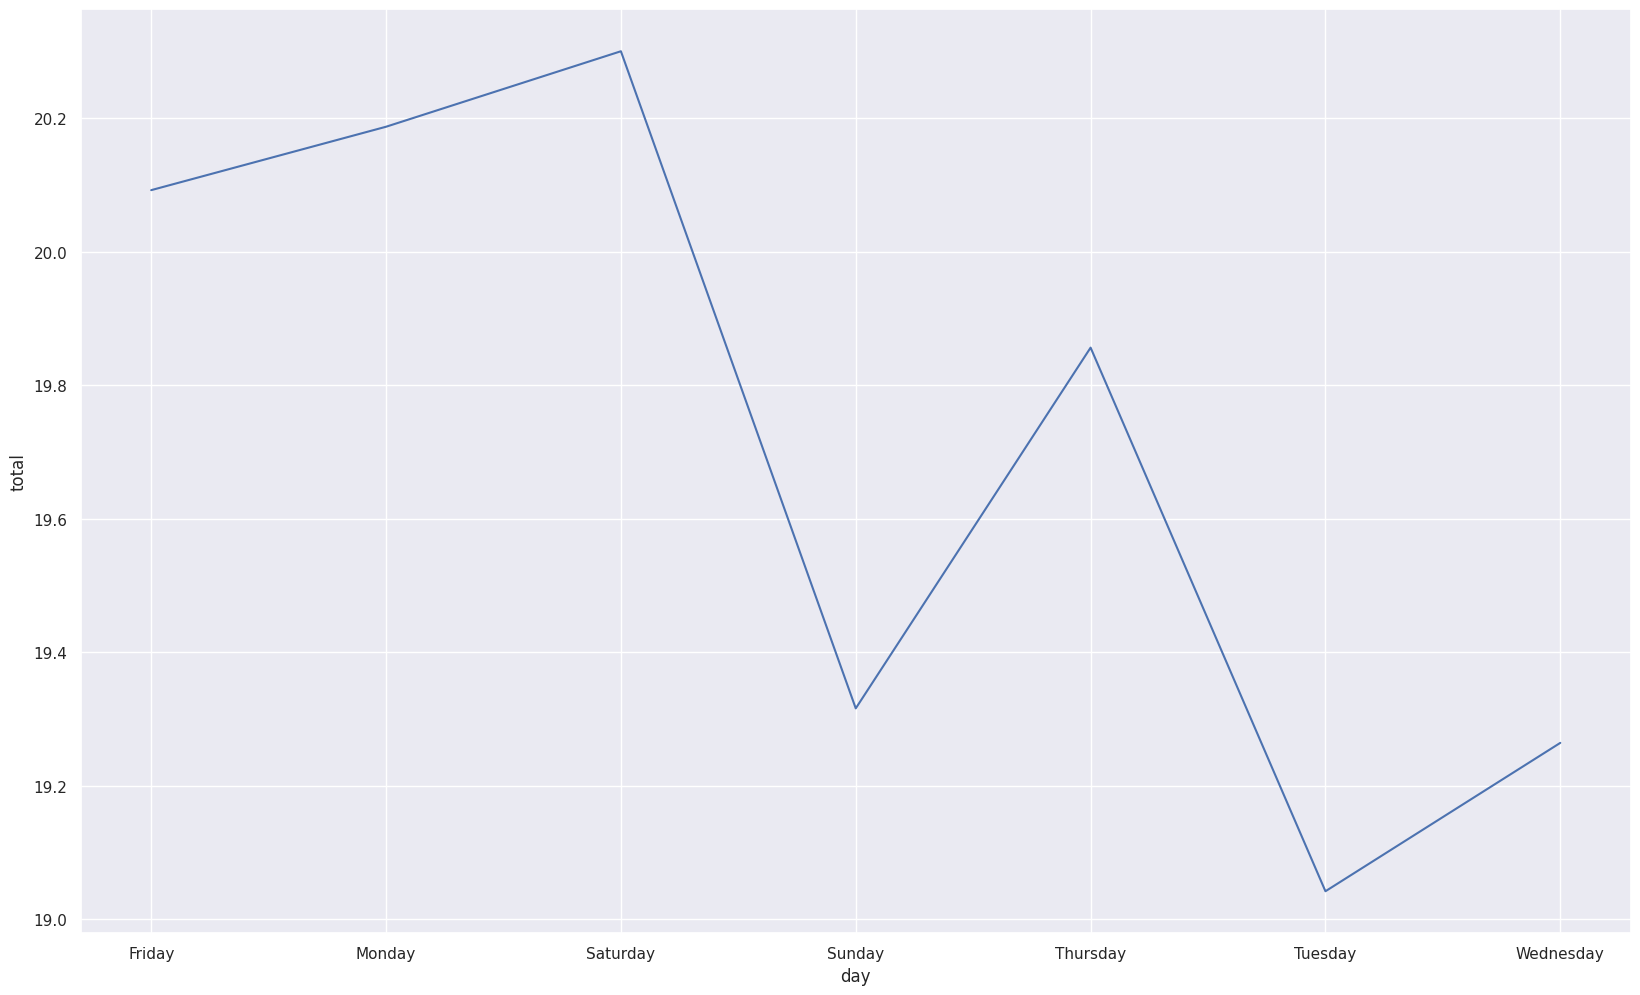

In [126]:

sns.lineplot(x= df.groupby(df.day).mean().index, 
             y = df.groupby(df.day).mean()['total'])

###**Inference**: We may say that the highest sale is on Saturdays,Thurdays and Fridays since the rest of the days are working days and people on sundays may go out for vacations,short trips or out of towns.

Quantity of each category.

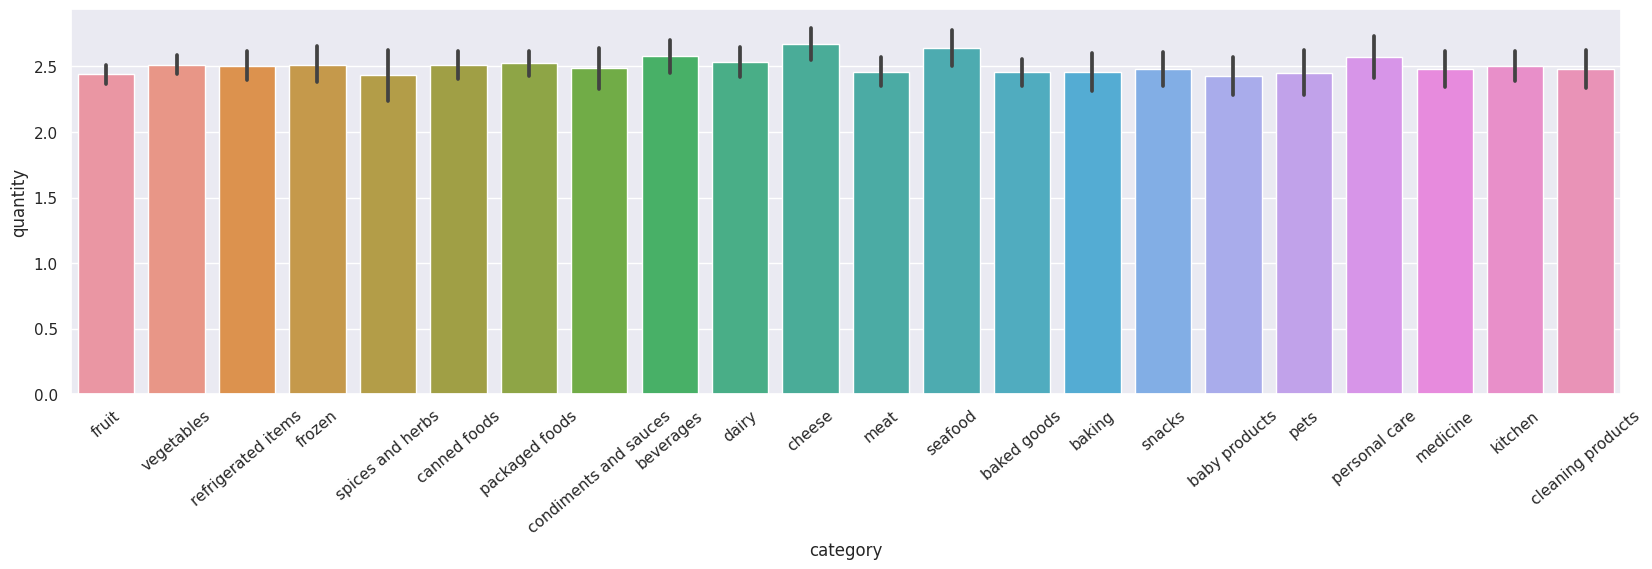

category
baby products       4
baked goods         4
spices and herbs    4
Name: quantity, dtype: int64


In [196]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x='category',y='quantity',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.show()
print(df.groupby('category').max()['quantity'].sort_values(ascending=False).head(3))


###Inference: We may say that the highest quantites present at our store are Seafoods, Cheese, Personal Care, Dairy.

# Multi-Variate

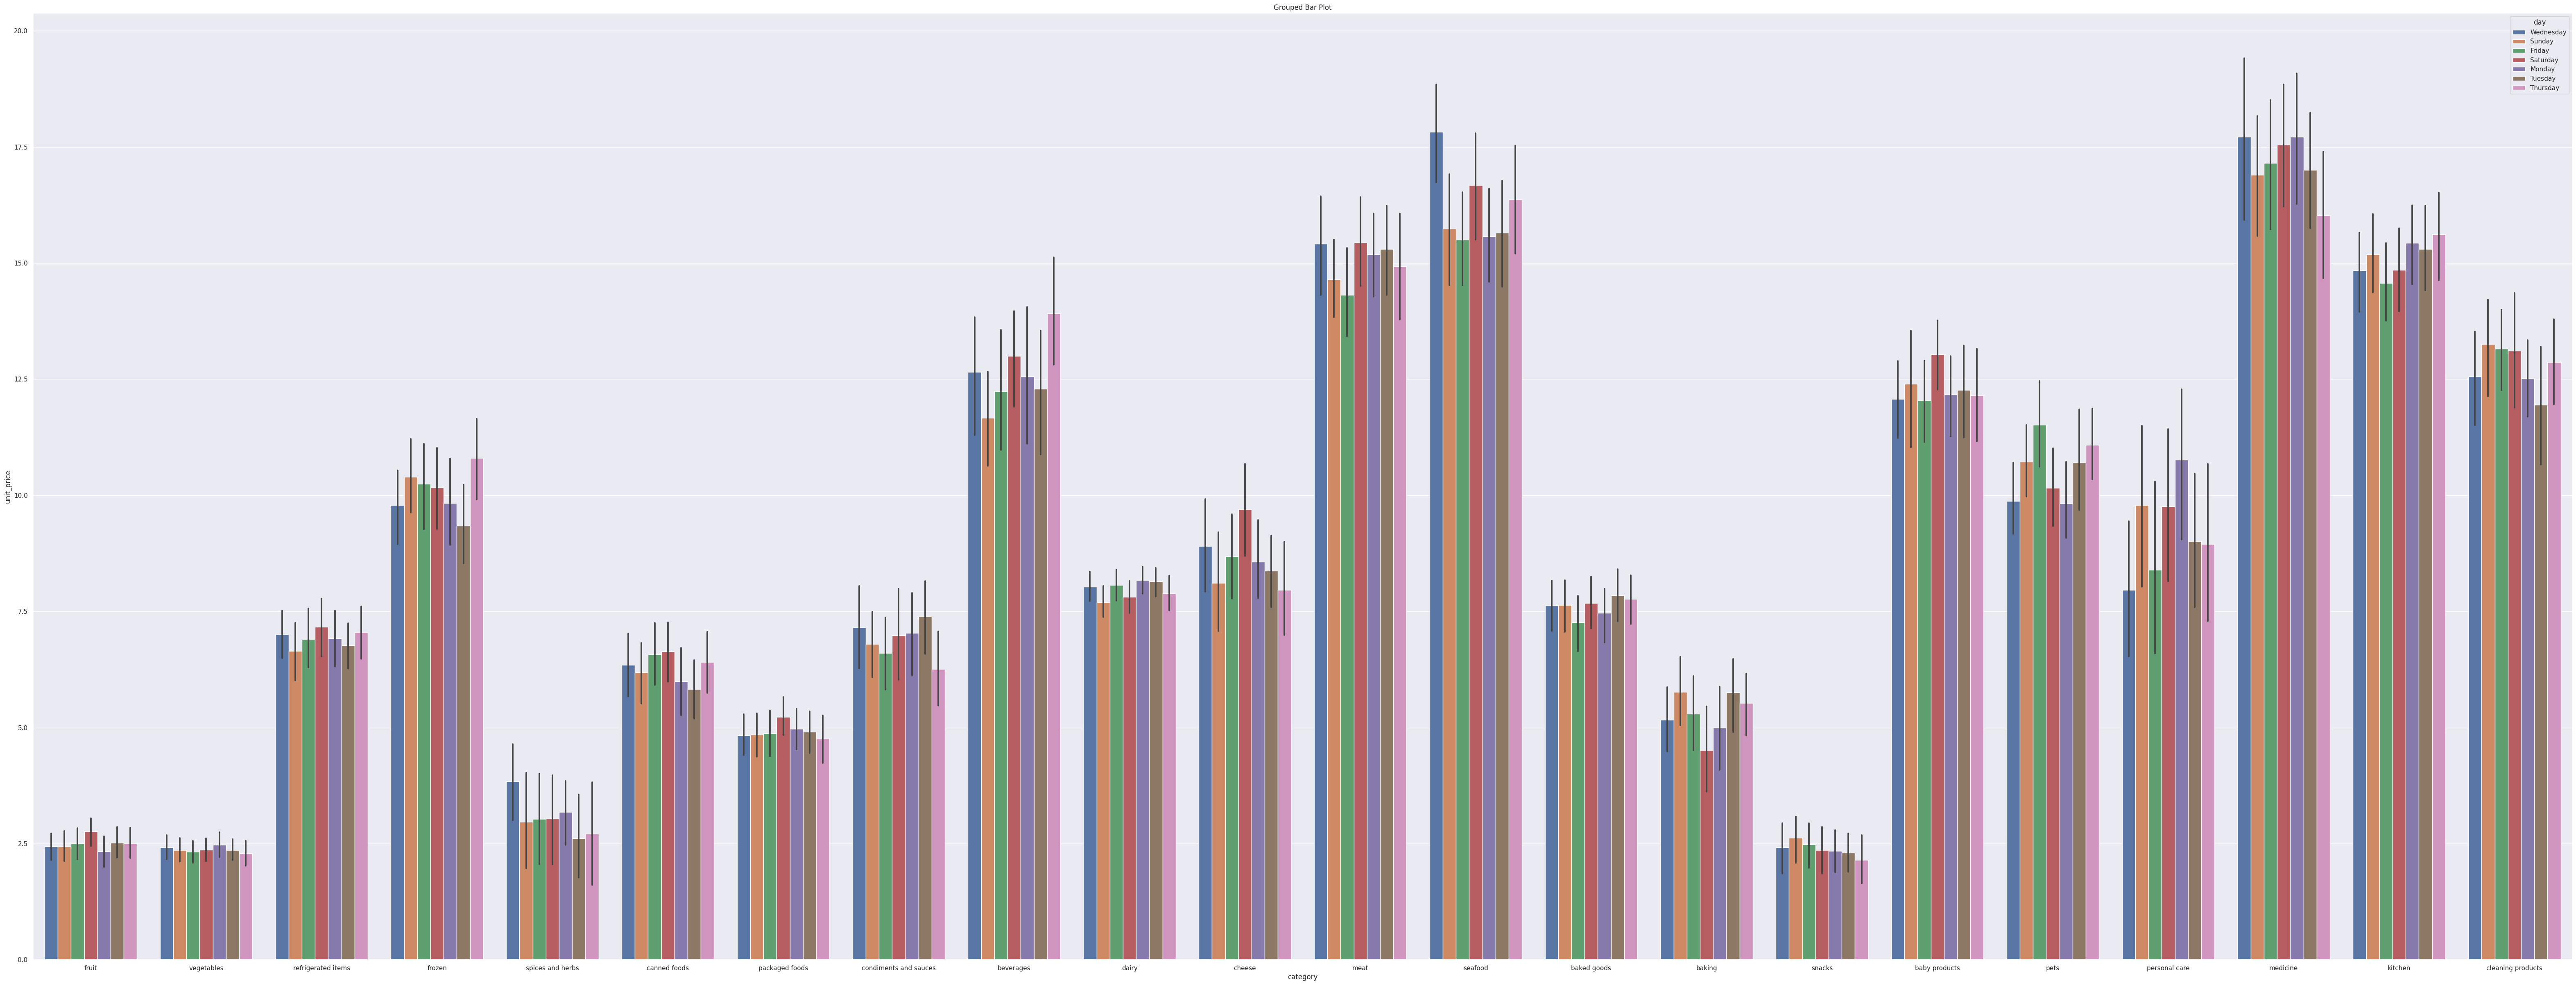

In [199]:
plt.figure(figsize=(80, 30))  # Adjust the width and height as desired

# Create the grouped bar plot
sns.barplot(x='category', y='unit_price', hue='day', data=df)

# Add title and display the plot
plt.title('Grouped Bar Plot')
plt.show()

Here we may see that, Seafood, Frozen items and beverages quantity is huge at our store compraed to rest, since the meat and seafoods are the highest profitable items.